In [7]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
import matplotlib.pyplot as plt
from xgboost.sklearn import XGBRegressor
import xgboost as xgb
from sklearn import preprocessing 
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
df = read_csv('data output.csv',header=0)
array=df.values
#print(array)
x=array[:,2:15]
x=preprocessing.scale(x)
y=array[:,1]
#print(x)
print(y)

[260.73 257.43 255.6 ... 3919.44 3942.53 4012.83]


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:180: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [3]:
clf=XGBRegressor()
clf.fit(x,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [4]:
print(clf.feature_importances_)


[0.1237785  0.03094462 0.03745928 0.0228013  0.0228013  0.02931596
 0.09446254 0.03745928 0.0276873  0.0504886  0.04885994 0.07654723
 0.39739415]


['Volume' 'Num_bitcoin_address' 'bitcoin_transactions' 'Mining_Difficulty'
 'mine_a_block_min' 'Block_size' 'Weighted_litecoin_price'
 'Weighted_gold_price' 'Oil_price' 'usd/euro' 'Num_Wiki_view' 'Num_tweets'
 ' 3d MA']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


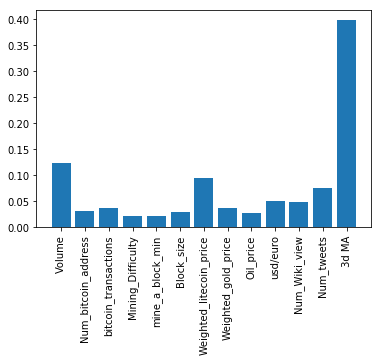

In [5]:
name = df.columns.values[2:15]
print(name)
ticks = [i for i in range(len(name))]
print(ticks)
pyplot.bar(ticks,clf.feature_importances_)
pyplot.xticks(ticks,name, rotation='vertical')
pyplot.show()

Text(0, 0.5, 'Feature Importance Score')

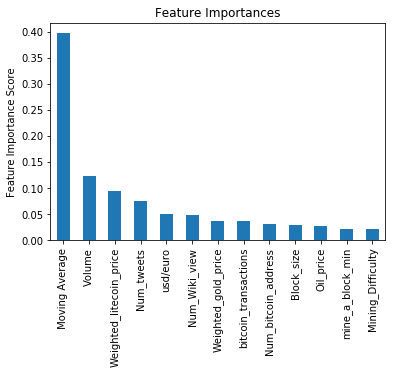

In [6]:
feat_imp = pd.Series(clf.feature_importances_,index =['Volume','Num_bitcoin_address','bitcoin_transactions','Mining_Difficulty',
 'mine_a_block_min','Block_size','Weighted_litecoin_price',
 'Weighted_gold_price','Oil_price','usd/euro','Num_Wiki_view','Num_tweets',
 ' Moving Average']).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [9]:
df = read_csv('Final.csv',header=0)
array=df.values
#print(array)
x=array[:,2:20]
x=preprocessing.scale(x)
y=array[:,1]
print(x)
print(y)

[[-0.81710153 -1.61794397 -1.47135158 ... -0.90593411 -1.39454171
  -1.0047334 ]
 [-0.85833128 -1.56224685 -1.5033873  ... -0.90593411 -1.39454171
  -1.0047334 ]
 [-0.8774524  -1.61993084 -1.7048819  ... -0.90593411 -1.39454171
  -1.0047334 ]
 ...
 [ 4.49492786  0.88284775  1.05193866 ... -1.53265008  1.15577577
   1.39280332]
 [ 3.89299007  0.81264711  1.00404705 ... -1.37597109  1.15577577
   1.39280332]
 [ 4.04463158  0.17667995  0.44183485 ... -1.37597109  1.15577577
   1.39280332]]
[258.62 255.41 256.34 ... 3924.37 3960.91 4048.73]


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:180: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [10]:
clf=xgb.XGBRegressor()
clf.fit(x,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [11]:
print(clf.feature_importances_)

[0.08471761 0.0614618  0.02491694 0.02491694 0.02325581 0.02491694
 0.13289036 0.03322259 0.02325581 0.06976745 0.03156146 0.06976745
 0.23421927 0.03654485 0.04983389 0.02325581 0.02325581 0.0282392 ]


Text(0, 0.5, 'Feature Importance Score')

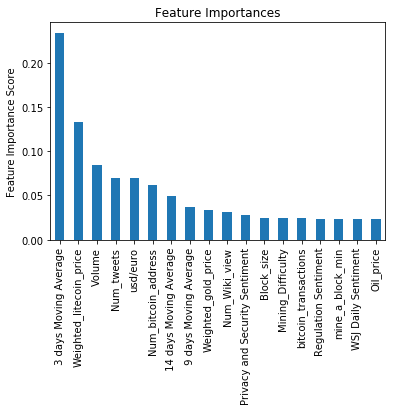

In [12]:
feat_imp = pd.Series(clf.feature_importances_,index =['Volume','Num_bitcoin_address','bitcoin_transactions','Mining_Difficulty',
 'mine_a_block_min','Block_size','Weighted_litecoin_price',
 'Weighted_gold_price','Oil_price','usd/euro','Num_Wiki_view','Num_tweets',
 ' 3 days Moving Average',' 9 days Moving Average',' 14 days Moving Average','WSJ Daily Sentiment','Regulation Sentiment','Privacy and Security Sentiment']).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')